To cluster customers into distinct groups based on their purchasing behavior using unsupervised learning (clustering).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

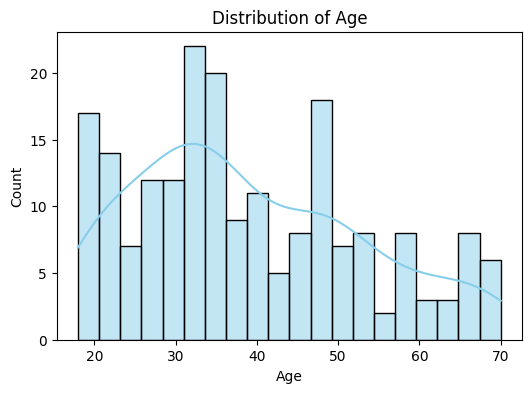

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


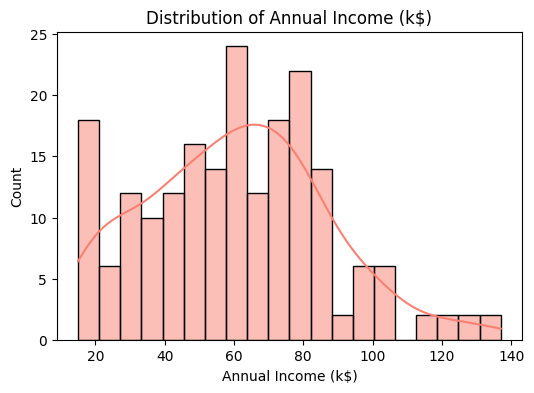

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

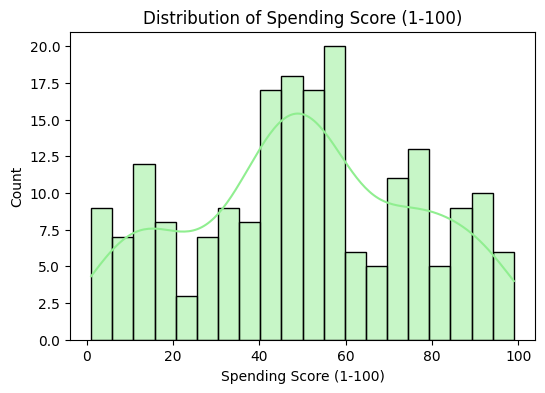

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17892\2331452015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


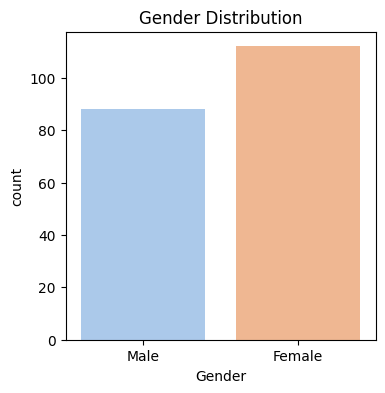

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()


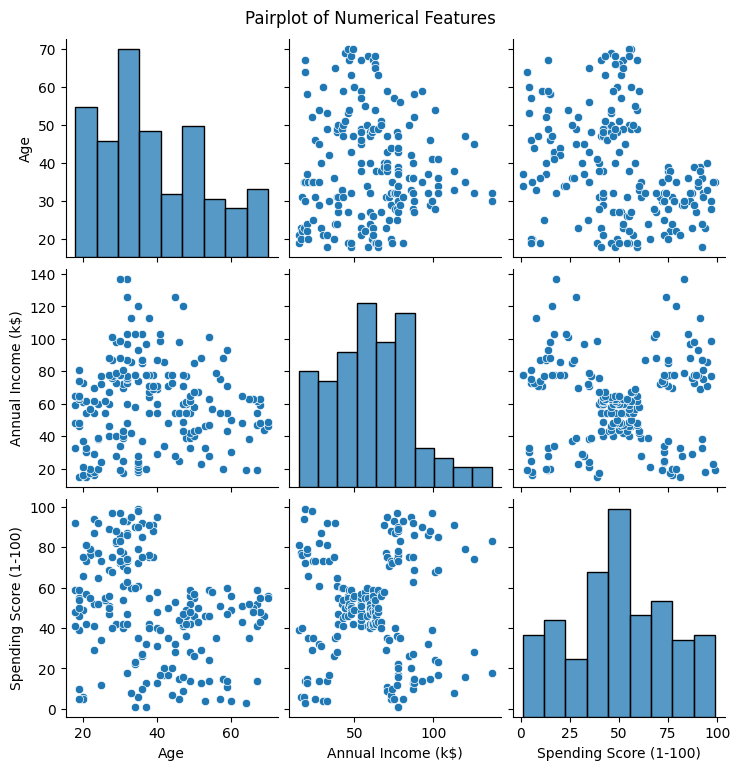

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

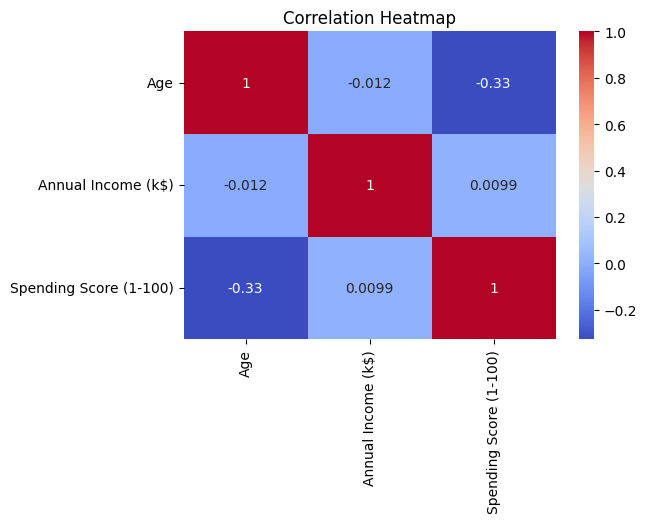

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


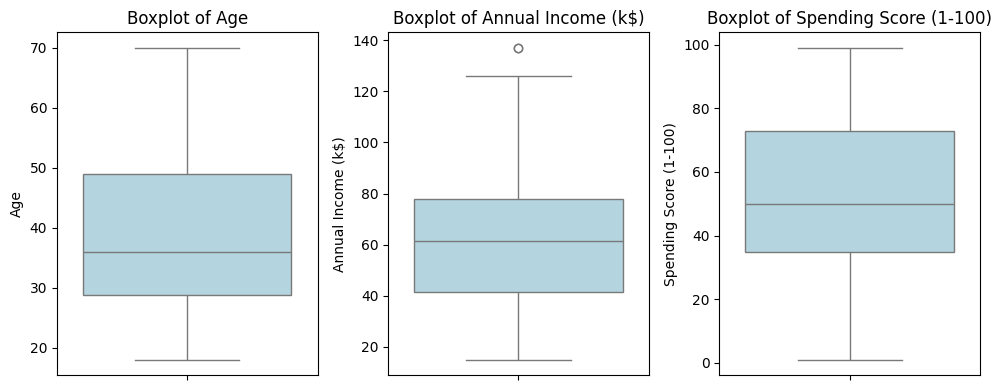

In [15]:
plt.figure(figsize=(10,4))
for idx, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [20]:
# Identify column types
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Combine using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [21]:
X_processed = pipeline.fit_transform(X)
print(f"Processed feature shape: {X_processed.shape}")


Processed feature shape: (200, 4)


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

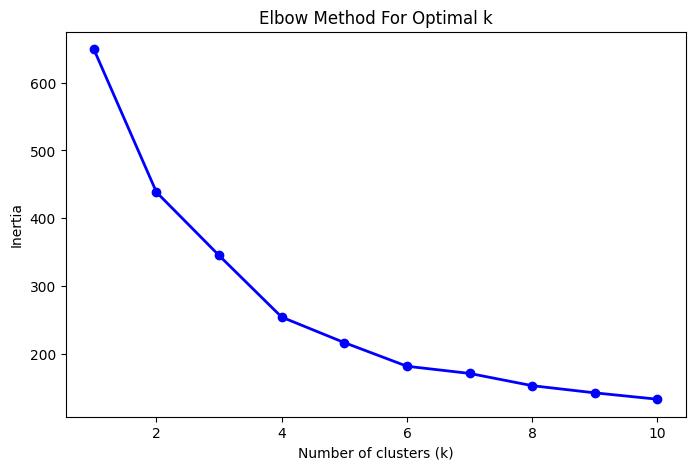

In [23]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', linewidth=2)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


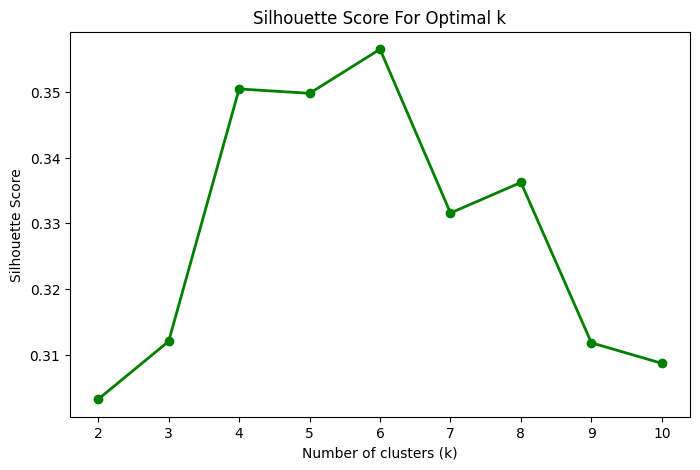

Optimal k based on silhouette score: 6


In [24]:
silhouette_scores = []
k_range = range(2, 11)  # silhouette requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2)
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Print optimal k suggestion
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k based on silhouette score: {optimal_k}")


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_processed)

# Attach cluster labels to original data
df['Cluster'] = cluster_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


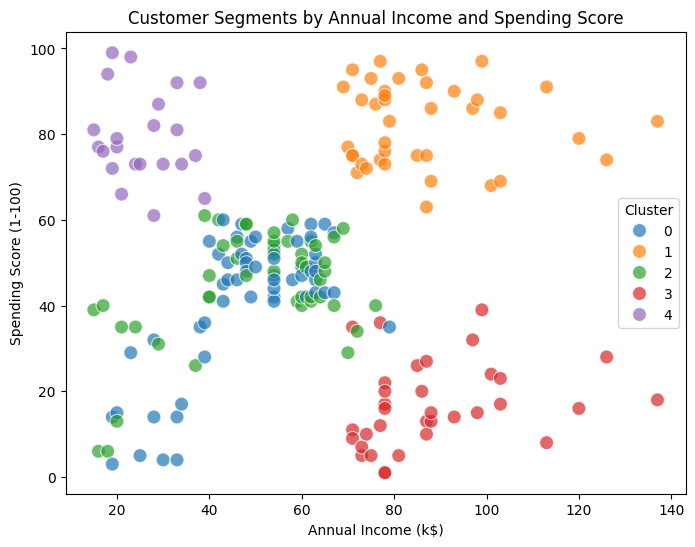

In [26]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10',
    s=100,
    alpha=0.7
)

plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_processed, cluster_labels)
print(f"Silhouette Score for k={kmeans.n_clusters}: {score:.3f}")


Silhouette Score for k=5: 0.350


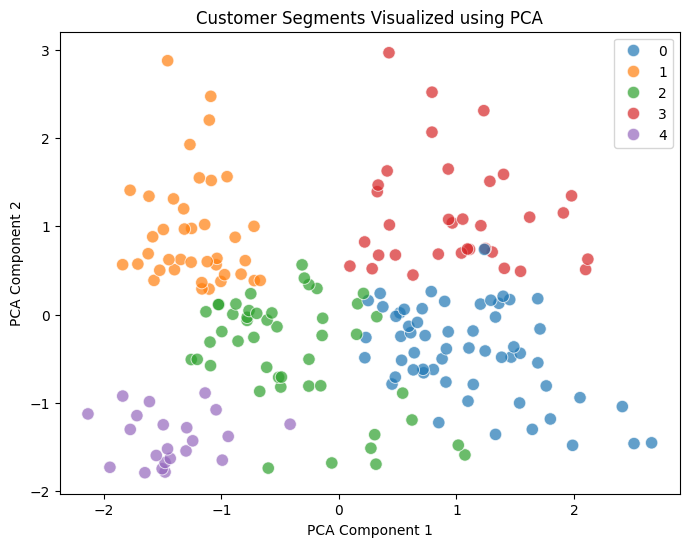

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=cluster_labels,
    palette='tab10',
    s=80,
    alpha=0.7
)

plt.title('Customer Segments Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [31]:
import joblib

# After fitting in notebook:
pipeline.fit(X)
kmeans.fit(pipeline.transform(X))

# Save them
joblib.dump(pipeline, 'pipeline.pkl')
joblib.dump(kmeans, 'kmeans.pkl')

['kmeans.pkl']